In [20]:
# Import all necessary libraries.
import numpy as np
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [26]:
# Number of BPSK symbols to be transmitted.
N = 1000000

In [27]:
# Instantiate a Gaussian naive Bayes classifier.
gnb = GaussianNB()

In [28]:
# Create Es/N0 vector.
EsN0dB = np.arange(-10,12,2)

ber_simu = np.zeros(len(EsN0dB))
ber_theo = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):
    
    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N BPSK symbols.
    x = 2.0 * (np.random.rand(N) >= 0.5) - 1.0
    # Reshape into a Nx1 column vector.
    x = x.reshape(N, 1)
    
    # Generate noise vector. 
    # Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
    noise = np.sqrt(EsN0Lin/2.0)*np.random.randn(N, 1)
    
    # Pass symbols through AWGN channel.
    y = x + noise
    
    # Fit.
    gnb.fit(y, x.ravel())
    
    # Predict.
    detected_x = gnb.predict(y)
    detected_x = detected_x.reshape(N, 1)
    
    # Simulated BPSK BER.
    error = (x != detected_x).sum()
    ber_simu[idx] = 1.0 * error / N
    
    # Theoretical BPSK BER.
    ber_theo[idx] = 0.5*erfc(np.sqrt(10.0**((EsN0dB[idx]/10.0))))

Es/N0 dB: -10
Es/N0 dB: -8
Es/N0 dB: -6
Es/N0 dB: -4
Es/N0 dB: -2
Es/N0 dB: 0
Es/N0 dB: 2
Es/N0 dB: 4
Es/N0 dB: 6
Es/N0 dB: 8
Es/N0 dB: 10


In [29]:
# Print Es/N0 versus BER values.
for i in range(0,len(ber_simu)): print('Es/N0:%d \t- BER: %e' % (EsN0dB[i], ber_simu[i]))

Es/N0:-10 	- BER: 3.285510e-01
Es/N0:-8 	- BER: 2.868310e-01
Es/N0:-6 	- BER: 2.400270e-01
Es/N0:-4 	- BER: 1.858190e-01
Es/N0:-2 	- BER: 1.310050e-01
Es/N0:0 	- BER: 7.893600e-02
Es/N0:2 	- BER: 3.754000e-02
Es/N0:4 	- BER: 1.253000e-02
Es/N0:6 	- BER: 2.336000e-03
Es/N0:8 	- BER: 1.850000e-04
Es/N0:10 	- BER: 0.000000e+00


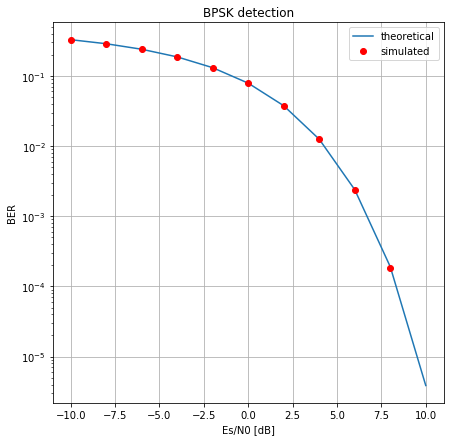

In [30]:
# Plot Es/N0 versus BER values.
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ber_theo, label='theoretical')
plt.plot(EsN0dB, ber_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK detection')
plt.legend()
plt.show()